In [1]:
import pandas as pd
import matplotlib.pyplot as plt

fn = "./data/AED自動體外心臟去顫器.csv"
df = pd.read_csv(fn,engine="python")    #讀取csv檔案
dfGroup = df.groupby("district")        #以district欄位來群組資料
distNum = dfGroup["district"].count()   #計算各區域出現次數(Series)
dist = list(distNum.index)              #各區名稱 

In [2]:
def main():
    while True:
        print("---台北市AED自動體外心臟去顫器查詢---")
        menu()
        choice = input("請選擇欲查詢項目:")     #choice選擇項目(str)
        print()
        if choice == 'A':
            while True:
                try:
                    menuDist()
                    global choiceDist
                    choiceDist = int(input("\n請選擇欲查詢區域:"))   #choiceDist選擇區域(int)
                    print()
                    if choiceDist >=1 and choiceDist <=len(dist):
                        while True:
                            try:
                                menuLoc()
                                global choiceName
                                choiceName = int(input("請選擇欲查詢地點(按0返回前頁):"))   #choiceLoc選擇地點(int)
                                print()
                                if choiceName >=1 and choiceName <= int(distNum[choiceDist-1]):
                                    print("{}:".format(Name[choiceName-1]))  
                                    print("AED位置:",end=" ")
                                    disp_loc(choiceName) 
                                    print("地址:",end=" ")
                                    disp_add(choiceName) 
                                    print("電話:",end=" ")
                                    disp_tel(choiceName)                                 
                                    input("請按任意鍵返回前一頁")     #返回menuItem()
                                elif choiceName == 0:
                                    print("")
                                    break
                                else:
                                    print("請輸入1~{}! 請按任意鍵繼續..".format(int(distNum[choiceDist-1])))
                                    input("")
                            except ValueError:
                                print("\n請輸入正確的選項! 按任意鍵繼續..")
                                input("")     
                    elif choiceDist == 0:
                        print("")
                        break
                    else:
                        print("請輸入1~{}! 請按任意鍵繼續..".format(len(dist)))
                        input("")               
                except ValueError:
                    print("\n請輸入正確的選項! 按任意鍵繼續..")
                    input("")
        elif choice == 'B':
            pltAreaNum()
            input("請按任意鍵返回前一頁") 
        elif choice == '0':
            print("返回總目錄\n")
            break
        else:
            print("請輸入A或B查詢! 請按任意鍵繼續..")
            input("")

In [3]:
def menu():
    print("A.各區AED位置資訊查詢")
    print("B.各區AED數量統計圖表")
    print("0.返回總目錄")

In [4]:
def menuDist():       
    print("------------請按0返回前一頁-------------")
    for i in range(len(dist)):
        print("{:2d}.".format(i+1),dist[i],end="  ",sep="")
        if (i+1)%5 == 0:
            print("")

In [5]:
def menuLoc():
    print("------------請按0返回前一頁-------------")
    global Area,fil,Name,Add,Tel,Loc
    Area = dist[choiceDist-1]          #所選的區域
    fil = (df["district"] == Area)     #篩選所選的區域
    Name = list(df[fil]['name'])       #所選區域的所有地點
    Add = list(df[fil]['address'])     #所選區域的所有地址
    Tel = list(df[fil]['telephone'])   #所選區域的所有電話
    Loc = list(df[fil]['location'])    #所選區域的所有位置   
    count = 0
    for i in range(len(df[fil]['name'])):
        count += 1
        print(count,Name[i])  

In [6]:
def disp_add(choiceName):
    print(Add[choiceName-1])        #所選地點的地址  
def disp_tel(choiceName):
    print(Tel[choiceName-1])        #所選地點的電話
def disp_loc(choiceName):
    print(Loc[choiceName-1])        #所選地點的位置
def pltAreaNum():
    plt.figure(figsize=(14,9))                  #設定長條圖版面大小
    colors = ['aqua','r','darkgreen','b',       #設定各長條顏色
              'brown','chartreuse',             
              'chocolate','coral',
              'darkblue','c','fuchsia','g']
    plt.bar(dist,distNum,color=colors)          #繪製長條圖內容及顏色
    plt.title("台北市各行政區AED數量",size=22)    #設定長條圖標題與大小
    plt.grid()                                  #顯示長條圖格線
    plt.ylabel("數量(個)",fontsize=18)           #設定長條圖y軸座標及大小
    plt.xticks(fontsize=18)                     #設定長條圖x軸座標刻度大小
    plt.yticks(fontsize=18)                     #設定長條圖y軸座標刻度大小
    plt.show()                                  #顯示長條圖

---台北市AED自動體外心臟去顫器查詢---
A.各區AED位置資訊查詢
B.各區AED數量統計圖表
0.返回總目錄
請選擇欲查詢項目:A

------------請按0返回前一頁-------------
 1.中山區   2.中正區   3.信義區   4.內湖區   5.北投區  
 6.南港區   7.士林區   8.大同區   9.大安區  10.文山區  
11.松山區  12.萬華區  
請選擇欲查詢區域:1

------------請按0返回前一頁-------------
1 台北健身中心有限公司
2 臺北市立濱江國中
3 臺北市立新興國民中學
4 緹力士健康事業股份有限公司-大直會館
5 大同股份有限公司
6 老爺大酒店股份有限公司
7 臺北捷運中山站R14
8 臺北捷運劍南路站BR15
9 大同股份有限公司
10 美麗華大直影城
11 華泰王子大飯店
12 欣欣秀泰影城
13 臺北市第一殯儀館
14 林安泰古厝民俗文物館
15 臺北市中山區公所
16 臺北捷運民權西路站R13
17 全聯實業股份有限公司(大直總部)
18 臺北捷運行天宮站O09
19 臺北捷運大直站BR14
20 伸適開發股份有限公司
21 台北市河濱自行車租借站美堤站
22 台北之家（光點台北）
23 臺北捷運松江南京站O12
24 臺北捷運中山國小站O10
25 臺北捷運南京復興站G18
26 臺北捷運松江南京站G17
27 大地清旅旅店
28 臺北捷運中山國中站BR12
29 立榮航空股份有限公司
30 立榮航空股份有限公司
31 立榮航空股份有限公司
32 立榮航空股份有限公司
33 和泰汽車股份有限公司
34 財團法人台北市中山基督長老教會
35 玉山銀行商業股份有限公司-登峰大樓A棟
36 台北威斯汀六福皇宮
37 新光三越百貨(股)公司台北南西分公司二館
38 新光三越百貨（股）公司台北南西分公司
39 立榮航空股份有限公司
40 長榮國際股份有限公司
41 新光三越百貨(股)公司台北南西分公司三館
42 欣欣大眾市場股份有限公司
43 財團法人臺灣敦睦聯誼會所屬作業組織圓山大飯店
44 MAJI MAJI集食行樂
45 巴克斯有限公司
46 布勒斯運動顧問
47 臺北市朱崙老人公寓
48 上海商業儲蓄銀行股份有限公司(總行)
49 實踐大學
50 臺北市中

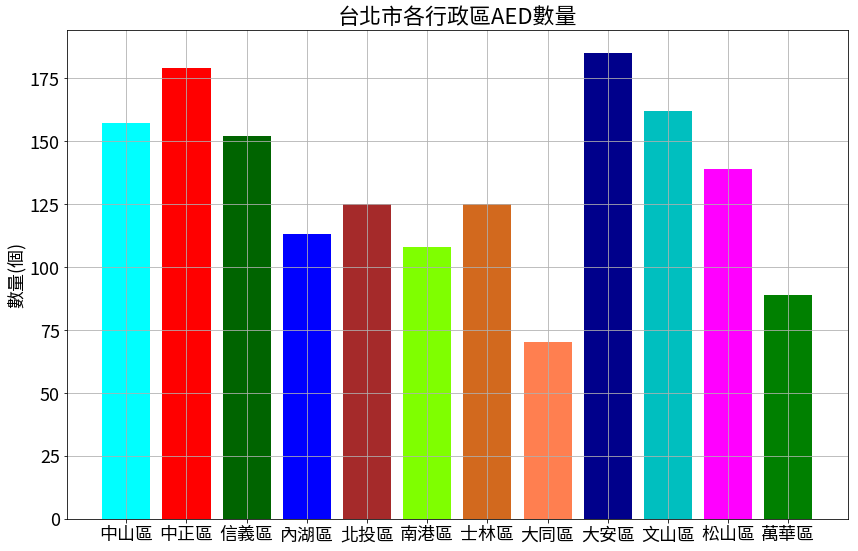

In [ ]:
main() 